# 魚釣り過程（ローカルモデル）

In [23]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def lkf(T, Y, x0, P0, Q, R):
    '''Linear Kalman Filter with local model
    
    - 状態方程式
        x = A * x_ + w, w ~ N(0,Q)
    - 観測方程式
        y = C * x + v, v ~ N(0,R)
    
    Parameters
    ==========
    - T : ステップ数
    - Y : 観測列
    - x0 : 初期状態推定値
    - P0 : 初期誤差分散
    - Q, R : カルマンフィルタの分散
    
    Returns
    =======
    - M : 状態推定値列
    - S: 推定された共分散行列の列
    '''
    P=P0 # 初期誤差共分散行列
    x_hat = np.array([x0]) # 初期状態推定値

    M = [x_hat] # 状態推定値列
    S=[P0]
    for i in range(T-1):
        # 予測ステップ
        x_ =  x_hat
        P_ =  P + Q
        # フィルタリングステップ
        yi = Y[i+1] -  x_ # 誤差の算出
        g = P_  / float( P_  + R) # カルマンゲインの算出
        # 更新
        x_hat = x_ + g * yi
        P = (1 - g) * P_
        M.append(x_hat)
        S.append(P)
        print yi
    return M,S

## 魚釣り過程実行例

[-0.95420807]
[-1.49630372]
[ 0.01982727]
[ 0.23788417]
[-1.55848756]
[ 1.72944663]
[-0.00159946]
[-1.82636701]
[ 0.46144625]
[-1.00648467]
[ 2.92952392]
[ 2.23361059]
[ 1.19930863]
[-0.02392029]
[-2.81750432]
[-2.81752506]
[-1.7418871]
[ 0.02682428]
[-0.55671616]


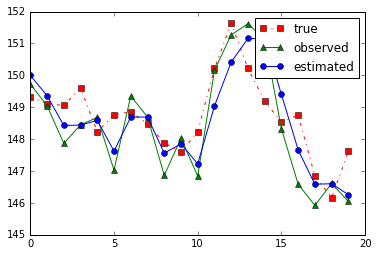

In [24]:
# 状態方程式
# x = x_  + w, w ~ N(0,Q)
Q = 1
# 観測方程式
# y = x + v, v ~ N(0,R)
R = 1

# 観測のテストデータの生成
T = 20 # 観測数
x = 150 # 初期状態
X = [] # 状態列
Y = [] # 観測列
for i in range(T):
    x = x + np.random.normal(0, Q, 1)
    X.append(x)
    y = x + np.random.normal(0, R, 1)
    Y.append(y)

# LKF
x0 = 150 # 初期状態推定値
P0 =1 # 初期誤差共分散行列
M,P = lkf(T, Y, x0, P0, Q, R)

# 描画
a = np.array(np.concatenate(X))
plt.plot(a,'rs-.')
plt.legend('')
a = np.array(np.concatenate(Y))
plt.plot(a,'g^-')
plt.legend('')
a = np.array(np.concatenate(M))
plt.plot(a,'bo-')
plt.legend(['true','observed','estimated'])
#plt.axis('equal')
plt.show()


In [14]:
P

[1,
 0.6666666666666667,
 0.625,
 0.6190476190476191,
 0.6181818181818182,
 0.6180555555555555,
 0.6180371352785146,
 0.6180344478216819,
 0.6180340557275542,
 0.6180339985218034,
 0.618033990175597,
 0.6180339889579021,
 0.6180339887802426,
 0.6180339887543225,
 0.6180339887505408,
 0.6180339887499889,
 0.6180339887499087,
 0.6180339887498968,
 0.6180339887498951,
 0.6180339887498949]

# ロボットの位置推定

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def lkf_robot(T, Y, U, mu0, Sigma0, A, B, C, Q, R):
    '''Linear Kalman Filter
    - 状態方程式
        x = A * x_ + B * u + w, w ~ N(0,Q)
    - 観測方程式
        y = C * x + v, v ~ N(0,R)
    
    Parameters
    ==========
    - T : ステップ数
    - Y : 観測列
    - U : 入力列
    - mu0 : 初期状態推定値
    - Sigma0 : 初期誤差共分散行列
    - A, B, Q : 状態方程式の係数と分散
    - C, R: 観測方程式の係数と分散
    
    Returns
    =======
    - M : 状態推定値列
    - SIG: 共分散行列の列
    '''
    Sigma=Sigma0 # 初期誤差共分散行列
    mu = mu0 # 初期状態推定値

    M = [mu] # 状態推定値列
    SIG=[Sigma] #共分散行列推定値列
    for i in range(T-1):
        # 予測ステップを実装してください

        # フィルタリングステップを実装してください

        ## 更新を実装してください

        # 結果の格納
        M.append(mu)
        SIG.append(Sigma)
    return M,SIG



## ロボットの位置推定実行例

In [ ]:
# 状態方程式の定義
# x = A * x_ + B * u + w, w ~ N(0,Q)
theta=2*np.pi/10
A = np.mat([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
B = np.mat([[1,0], [0,1]])
Q = np.mat([[1,0], [0,1]])
# 観測方程式の定義
# y = C * x + v, v ~ N(0,R)
C = np.mat([[1,0], [0,1]])
R = np.mat([[5,0], [0,5]])

# 観測データの生成
T = 20 # 観測数
x = np.mat([[10],[10]]) # 初期位置
X = [] # 状態列
Y = [] # 観測列
u = np.mat([[1],[1]]) # 風による影響（一定）
U = [] # 入力列
for i in range(T):
    x = A * x + B * u + np.random.multivariate_normal([0, 0], Q, 1).T
    X.append(x)
    y = C * x + np.random.multivariate_normal([0, 0], R, 1).T
    Y.append(y)
    U.append(u)

# LKF
mu0 = np.mat([[10],[10]]) # 初期状態推定値
Sigma0 = np.mat([[1,0],[0,1]]) # 初期誤差共分散行列
M,Sigma = lkf_robot(T, Y, U, mu0, Sigma0, A, B, C, Q, R)

# 描画
a, b = np.array(np.concatenate(X,axis=1))
plt.plot(a,b,'rs-.')
a, b = np.array(np.concatenate(Y,axis=1))
plt.plot(a,b,'g^-')
a, b = np.array(np.concatenate(M,axis=1))
plt.plot(a,b,'bo-.')
plt.legend(['true','observed','estimated'])
plt.axis('equal')
plt.show()
